In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MLLibrary import *

In [2]:
x_data, y_data = Utilities.load_data('data/Classification_train.csv',start_x = 1,start_y = 0,end_y = 1)
x_train,y_train, x_cv,y_cv = Utilities.split_data(70, x_data, y_data)

scaler = StandardizationScale()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)

scaler2 = NormalizationScale()
x_train_scaled = scaler2.fit_transform(x_train_scaled)
x_cv_scaled = scaler2.transform(x_cv_scaled)

In [8]:
my_model = NeuralNet([
    Inputs(inputs=784),
    Layer(units=30, activation=Activations.relu),
    Layer(units=15, activation=Activations.relu),
    Layer(units=10, activation=Activations.softmax)
])

Epoch   1 ⫸ Cost 0.38642 ⫷
Epoch   2 ⫸ Cost 0.13201 ⫷
Epoch   3 ⫸ Cost 0.09458 ⫷
Epoch   4 ⫸ Cost 0.06708 ⫷
Epoch   5 ⫸ Cost 0.05382 ⫷
Epoch   6 ⫸ Cost 0.03880 ⫷
Epoch   7 ⫸ Cost 0.03053 ⫷
Epoch   8 ⫸ Cost 0.02364 ⫷
Epoch   9 ⫸ Cost 0.01791 ⫷
Epoch  10 ⫸ Cost 0.01246 ⫷
Epoch  11 ⫸ Cost 0.01025 ⫷
Epoch  12 ⫸ Cost 0.00778 ⫷
Epoch  13 ⫸ Cost 0.00526 ⫷
Epoch  14 ⫸ Cost 0.00395 ⫷
Epoch  15 ⫸ Cost 0.00333 ⫷
Epoch  16 ⫸ Cost 0.00313 ⫷
Epoch  17 ⫸ Cost 0.00212 ⫷
Epoch  18 ⫸ Cost 0.00168 ⫷
Epoch  19 ⫸ Cost 0.00136 ⫷
Epoch  20 ⫸ Cost 0.00135 ⫷
Epoch  21 ⫸ Cost 0.00113 ⫷
Epoch  22 ⫸ Cost 0.00087 ⫷
Epoch  23 ⫸ Cost 0.00077 ⫷
Epoch  24 ⫸ Cost 0.00067 ⫷
Epoch  25 ⫸ Cost 0.00063 ⫷
Epoch  26 ⫸ Cost 0.00056 ⫷
Epoch  27 ⫸ Cost 0.00052 ⫷
Epoch  28 ⫸ Cost 0.00049 ⫷
Epoch  29 ⫸ Cost 0.00045 ⫷
Epoch  30 ⫸ Cost 0.00042 ⫷
Epoch  31 ⫸ Cost 0.00039 ⫷
Epoch  32 ⫸ Cost 0.00037 ⫷
Epoch  33 ⫸ Cost 0.00035 ⫷
Epoch  34 ⫸ Cost 0.00033 ⫷
Epoch  35 ⫸ Cost 0.00032 ⫷
Epoch  36 ⫸ Cost 0.00030 ⫷
Epoch  37 ⫸ Cost 0.00029 ⫷
E

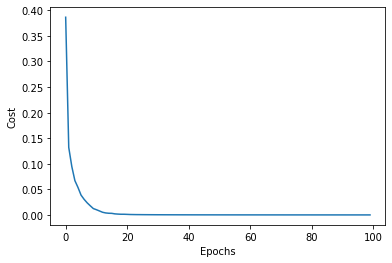

In [9]:
cost_history = my_model.fit(x_train_scaled,y_train,
                            cost_function=CategoricalCrossEntropy,
                            epochs=100,
                            alpha=0.3,
                            lambda_=0,
                            batch_size=50,
                            plot_cost=True)


In [13]:
predictions1 = my_model.predict(x_train_scaled)
yhat_train = np.argmax(predictions1,axis=1)
acc_train = Metrics.classifier_accuracy(yhat_train.reshape(-1,1), y_train)
print(f'Training accuracy: {acc_train}')

predictions = my_model.predict(x_cv_scaled)
yhat = np.argmax(predictions,axis=1)
acc = Metrics.classifier_accuracy(yhat.reshape(-1,1), y_cv)
print(f'CV accuracy: {acc}')

Training accuracy: 100.0
CV accuracy: 97.91111111111111


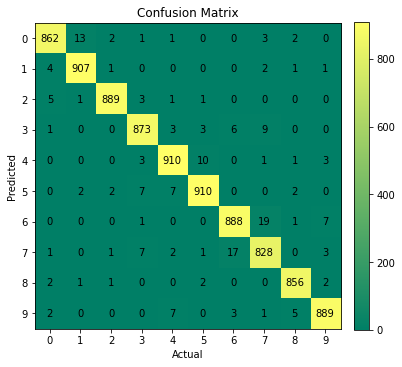

0.9790700746626169 0.9790702313528138


In [11]:
confusion,p,r = Metrics.confusion_matrix(yhat,y_cv,metrics=True)
print(p,r)